In [ ]:
'''One-hot encoding'''

import numpy as np

def onehot_enc(lbl, min_val=0):
  mi=min(lbl)
  enc=np.full((len(lbl),max(lbl)-mi+1), min_val, np.int8)
  for i, x in enumerate(lbl):
    enc[i, x-mi]=1
  return enc

def onehot_dec(enc, mi=0):
  return [np.argmax(e)+mi for e in enc]

In [ ]:
'''Contoh penggunaan onehot encoding'''

labels= 1, 2, 3, 4, 5
enc = onehot_enc(labels)
dec = onehot_dec(enc, min(labels))

print(enc)
print(dec)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]
[1, 2, 3, 4, 5]


In [ ]:
'''Fungsi aktivasi sigmoid dan turunannya'''

def sig(X):
 return [1/(1+np.exp(-x)) for x in X]

def sigd(X):
 output=[]
 for i, x in enumerate(X):
   s = sig([x])[0]
   output.append(s*(1-s))

 return output


In [ ]:
'''fungsi modeling (training) Backpropagation'''

def bp_fit(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1,print_per_epoch=100):
  nin=[np.empty(i) for i in layer_conf]

  n = [np.empty(j+1) if i<len(layer_conf)-1
      else np.empty(j) for i, j in enumerate(layer_conf)]
      
  w = np.array([np.random.rand(layer_conf[i]+1, layer_conf[i+1])
                for i in range(len(layer_conf)-1)])
  
  dw = [np.empty((layer_conf[i]+1, layer_conf[i+1]))
        for i in range(len(layer_conf)-1)]
        
  d = [np.empty(s) for s in layer_conf[1:]]
  din = [np.empty(s) for s in layer_conf[1:-1]]
  epoch = 0
  mse = 1

  for i in range(0, len(n)-1):
    n[i][-1]=1

  while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
    epoch +=1
    mse = 0
    for r in range(len(X)):
      n[0][:-1]=X[r]

      for L in range(1, len(layer_conf)):
        nin[L] = np.dot(n[L-1], w[L-1])
        n[L][:len(nin[L])]=sig(nin[L])

      e = target[r] - n[-1]
      mse += sum(e ** 2)
      d[-1]=e*sigd(nin[-1])
      dw[-1]=learn_rate * d[-1]*n[-2].reshape((-1,1))

      for L in range(len(layer_conf)-1, 1, -1):
        din[L-2]=np.dot(d[L-1], np.transpose(w[L-1][:-1]))
        d[L-2]=din[L-2]*np.array(sigd(nin[L-1]))
        dw[L-2]=(learn_rate*d[L-2])*n[L-2].reshape((-1,1))

      w += dw
    mse /= len(X)

    if print_per_epoch > -1 and epoch % print_per_epoch == 0:
      print(f'Epoch {epoch}, MSE: {mse}')

  return w, epoch, mse


In [ ]:
'''fungsi pengujian back propagation'''

def bp_predict(X,w):
  n=[np.empty(len(i)) for i in w]
  nin=[np.empty(len(i[0])) for i in w]
  predict = []
  n.append(np.empty(len(w[-1][0])))

  for x in X:
    n[0][:-1]=x

    for L in range(0, len(w)):
      nin[L] = np.dot(n[L], w[L])
      n[L+1][:len(nin[L])] = sig(nin[L])

    predict.append(n[-1].copy())
  
  return predict


In [ ]:
'''Klasifikasi varietas benih gandum'''

# Import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

# Load data, pisahkan data dan label
seeds_dataset = np.loadtxt('seeds_dataset.txt')

data = seeds_dataset[:, :7]
labels = seeds_dataset[:, 7].reshape((data.shape[0]))

label = []
for i in range (len(labels)) :
  label.append(int(labels[i]))
label = np.array(label)

X = minmax_scale(data)
Y = onehot_enc(label)

# Preprocess data: membagi data training, label training dan data testing, label testing (2/3 data training, 1/3 data testing)
# Atau dengan kata lain Memisahkan data training, data testing, label training, label testing (2/3 data training, 1/3 data testing)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1,test_size=.33)

# Membangun model JST / backpropagation menggunakan data training dan label training

w, ep, mse = bp_fit(X_train, y_train, layer_conf=(7,10,3),learn_rate=.1, max_epoch=1000, max_error=.1, print_per_epoch=25)
print(f'Epochs: {ep}, MSE: {mse}')

# Menguji model / Menguji kinerja backpropagation menggunakan data testing
predict = bp_predict(X_test, w)
predict = onehot_dec(predict)

predict1 = []
for i in range (len(predict)):
  predict1.append(predict[i]+1)

#Membandingkan luaran dengan label testing / target
y_test = onehot_dec(y_test)
acc = accuracy_score(predict, y_test)

y_test1 = []
for i in range (len(y_test)):
  y_test1.append(y_test[i]+1)

print("\nData test berjuumlah",len(X_test),"dan data training berjumlah",len(X_train))
print(f'\nOutput: {predict1}')
print(f'True: {y_test1}')
print(f'Accuracy: {acc}')

Epoch 25, MSE: 0.3780874223400139
Epoch 50, MSE: 0.25300573939130894
Epoch 75, MSE: 0.17113253066383194
Epoch 100, MSE: 0.14386486144689253
Epoch 125, MSE: 0.13004343136358784
Epoch 150, MSE: 0.12087545077445161
Epoch 175, MSE: 0.11385253131729851
Epoch 200, MSE: 0.10798971188862386
Epoch 225, MSE: 0.10283687851176643
Epochs: 240, MSE: 0.09999169815929547

Data test berjuumlah 70 dan data training berjumlah 140

Output: [1, 3, 1, 3, 1, 2, 1, 3, 3, 3, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 3, 1, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1, 2]
True: [1, 3, 1, 3, 1, 2, 1, 3, 3, 3, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 1, 3, 1, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 1, 1, 3, 3, 1, 3, 2, 1, 2, 3, 1, 3, 1, 3, 1, 2]
Accuracy: 0.9571428571428572


In [ ]:
'''Data baru dikenal sebagai apa'''
data_baru = np.array([[0.598,0.56,0.551,0.416,1.99,0.531,0.82]])

prediksi = bp_predict(data_baru,w)

print(onehot_dec(prediksi))


[2]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

overflow encountered in exp



0.2714285714285714
0.2714285714285714
0.9428571428571428
0.9428571428571428
0.9285714285714286
0.9428571428571428
0.2714285714285714
0.9571428571428572
0.9571428571428572
0.9571428571428572
0.9571428571428572
0.9571428571428572
0.9571428571428572
0.9428571428571428
0.9571428571428572
0.9571428571428572
0.9571428571428572
0.9428571428571428
0.9571428571428572


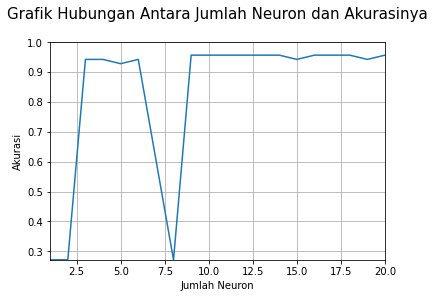

In [ ]:
import matplotlib.pyplot as plt

x = []
y_list = []
for i in range (1,21):
  if i != 7 :
    x.append(i)
    X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1,test_size=.33)
    w, ep, mse = bp_fit(X_train, y_train, layer_conf=(7,i,3),learn_rate=.1, max_epoch=1000, max_error=.1,print_per_epoch=2000)
    predict = bp_predict(X_test, w)
    predict = onehot_dec(predict)
    
    y_test = onehot_dec(y_test)
    
    acc = accuracy_score(predict, y_test)
    print(acc)
    y_list.append(acc)

title = 'Grafik Hubungan Antara Jumlah Neuron dan Akurasinya\n'
plt.title(title, loc='center' ,fontsize=15)
plt.plot(x,y_list)
plt.xlabel('Jumlah Neuron')
plt.ylabel('Akurasi')
plt.axis([min(x),20,min(y_list),1])
plt.grid()
plt.show()


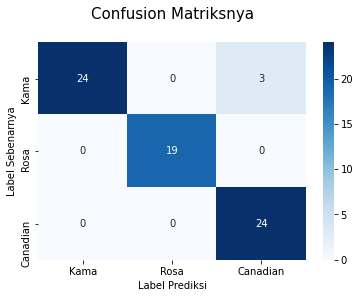

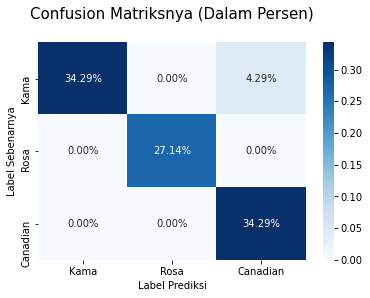

In [ ]:
'''Confusion Matriks nya'''

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test1,predict1)
#print(cf)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cf, cmap="Blues", annot=True)

title = 'Confusion Matriksnya\n'
plt.title(title, loc='center' ,fontsize=15)

yticks_labels = ['Kama','Rosa','Canadian']
plt.yticks(np.arange(3) + .5, labels=yticks_labels)
xticks_labels = ['Kama','Rosa','Canadian']
plt.xticks(np.arange(3) + .5, labels=xticks_labels)

plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.show()

print("\n")

sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%', cmap='Blues')
title = 'Confusion Matriksnya (Dalam Persen)\n'
plt.title(title, loc='center',fontsize=15)

yticks_labels = ['Kama','Rosa','Canadian']
plt.yticks(np.arange(3) + .5, labels=yticks_labels)
xticks_labels = ['Kama','Rosa','Canadian']
plt.xticks(np.arange(3) + .5, labels=xticks_labels)

plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.show()


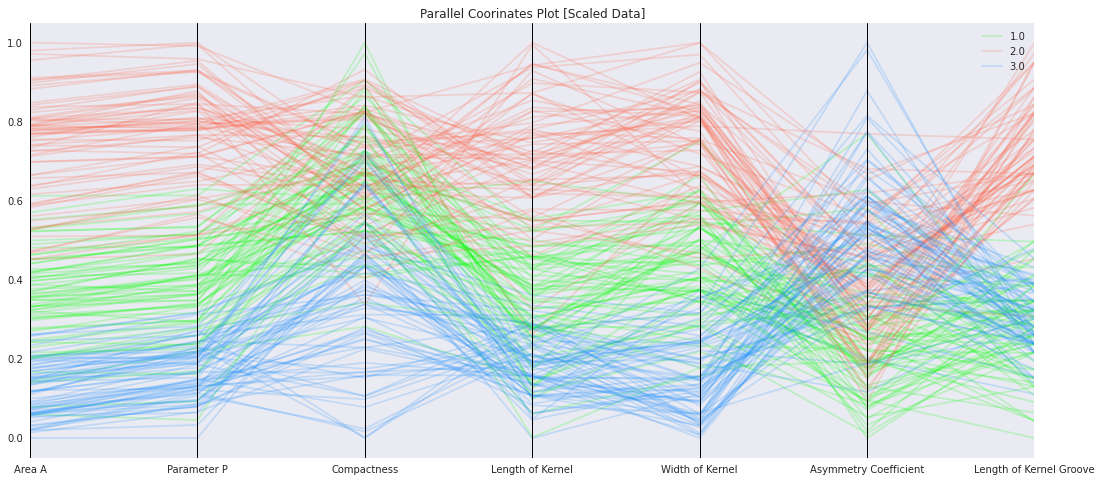

In [ ]:
'''Visualisasi Data Awal Parallel Coordinate Plot'''

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_boston, load_wine
from sklearn.preprocessing import minmax_scale

#from sklearn.preprocessing import MinMaxScaler

import plotly.express as px
import plotly.graph_objects as go

seeds_dataset = np.loadtxt('seeds_dataset.txt')

data = seeds_dataset[:,:7]
labels = seeds_dataset[:, 7].reshape((data.shape[0]))

data_li = np.hstack((data,labels.reshape(-1,1)))
data_df = pd.DataFrame(data=data_li, columns=['Area A','Parameter P','Compactness','Length of Kernel','Width of Kernel','Asymmetry Coefficient','Length of Kernel Groove']+["class"])
data_df.head()

data_scaled = minmax_scale(data)
data_scaled = np.hstack((data_scaled,labels.reshape(-1,1)))

data_scaled_df = pd.DataFrame(data=data_scaled, columns = ['Area A','Parameter P','Compactness','Length of Kernel','Width of Kernel','Asymmetry Coefficient','Length of Kernel Groove']+["class"])
data_scaled_df.head()

#plt.figure(figsize=(18,8))
#pd.plotting.parallel_coordinates(data_df, "class", color=["lime", "tomato","dodgerblue"]);

print("\n")

with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(18,8))
    pd.plotting.parallel_coordinates(data_scaled_df, "class",
                                     color=["lime", "tomato","dodgerblue"],
                                     alpha=0.2)

    plt.title("Parallel Coorinates Plot [Scaled Data]")


cols = ['Area A','Parameter P','Compactness','Length of Kernel','Width of Kernel','Asymmetry Coefficient','Length of Kernel Groove']

fig = px.parallel_coordinates(data_df, color="class", dimensions=cols,
                              title="Parallel Coorinates Plot")
fig.show()

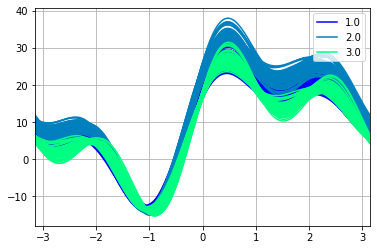

In [ ]:
import pandas as pd

data = seeds_dataset[:,:8]

df = pd.DataFrame(data, columns = ['Area A','Parameter P','Compactness','Length of Kernel','Width of Kernel','Asymmetry Coefficient','Length of Kernel Groove','class'])

pd.plotting.andrews_curves(df, 'class', colormap = 'winter')
